In [5]:
%load_ext autotimebar

Label(value='0s')

The autotimebar extension is already loaded. To reload it, use:
  %reload_ext autotimebar


In [6]:
# Run this cell only to generate new results and then change the name of the file in the next cell
# Use the gen_some_results arguments to set the variable parameters (only one supported to visualize the results in this notebook)
# Number arguments (generate n evenly spaced parameter numbers): -agents n, -tasks n, -tasks_frequency n, -starts n, -goals n
# Number arguments (generate n evenly spaced parameter numbers): -agents_list <args>, -tasks_list <args>, -tasks_frequency_list <args>, -starts_list <args>, -goals_list <args>
# This cell will take some time to run (obviously)
import subprocess

#subprocess.run(["python", "-m", 'gen_some_results', '-agents', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-tasks', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-tasks_frequency', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-starts', '5'])
#subprocess.run(["python", "-m", 'gen_some_results', '-goals', '5'])

Label(value='0s')

Namespace(agents=1, agents_list=None, starts=1, starts_list=None, goals=1, goals_list=None, tasks_frequency=5, tasks_frequency_list=None, tasks=1, tasks_list=None)
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.05 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  2.00%
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.05 
	Learning: True
Path collisions:  0
Switch collisions:  0
Progress:  4.00%
Running Simulation...
Avvio Simulazione: 
	Nome Mappa: input_warehouse_mid_with_middle_corridors 
	Numero Agenti: 8 
	Numero pickup: 24 
	Numero goal: 14 
	Numero task: 100 
	Task frequency: 0.2875 
	Learning: False
Path collisions:  0
Switch collisions:  0
Progress:  6.00%
Running Simulati

CompletedProcess(args=['python', '-m', 'gen_some_results', '-starts', '5'], returncode=0)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np

%matplotlib inline

plt.style.use('seaborn-v0_8-dark-palette')

with open("ResultsJsons/results_22_06_2024__20_01_03.json", "r") as f:
    results = json.load(f)

maps = results["maps"]
possible_number_of_tasks = results["tasks_num"]
possible_number_of_task_freq = results["tasks_frequency"]
possible_number_of_agents = results["agents_num"]
possible_number_of_starts = results["start_num"]
possible_number_of_goals = results["goal_num"]

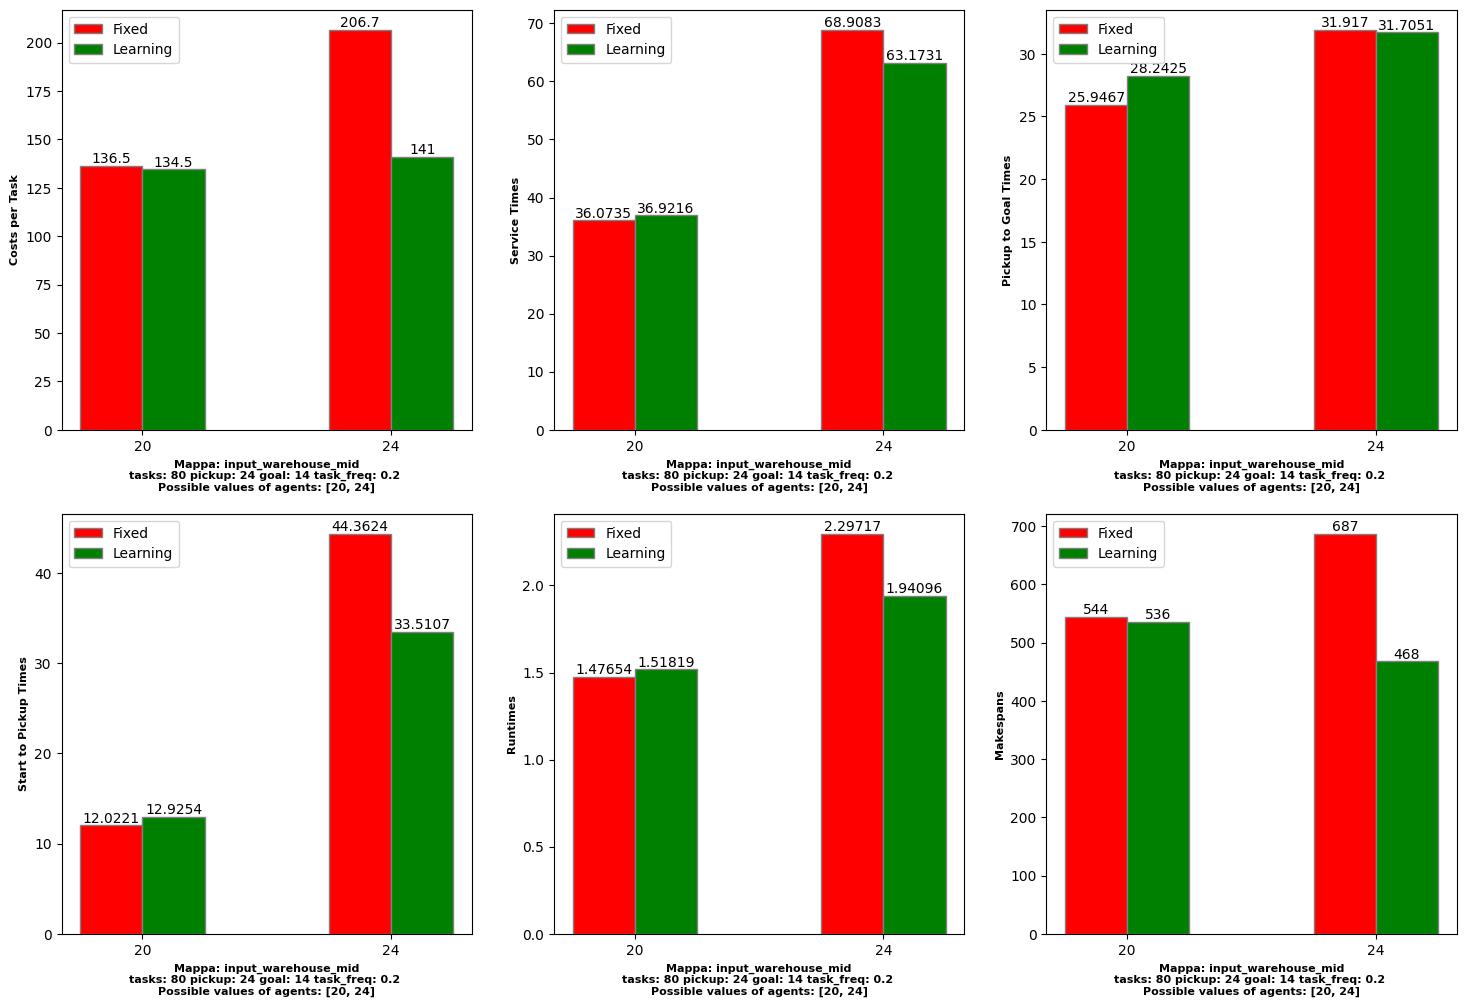

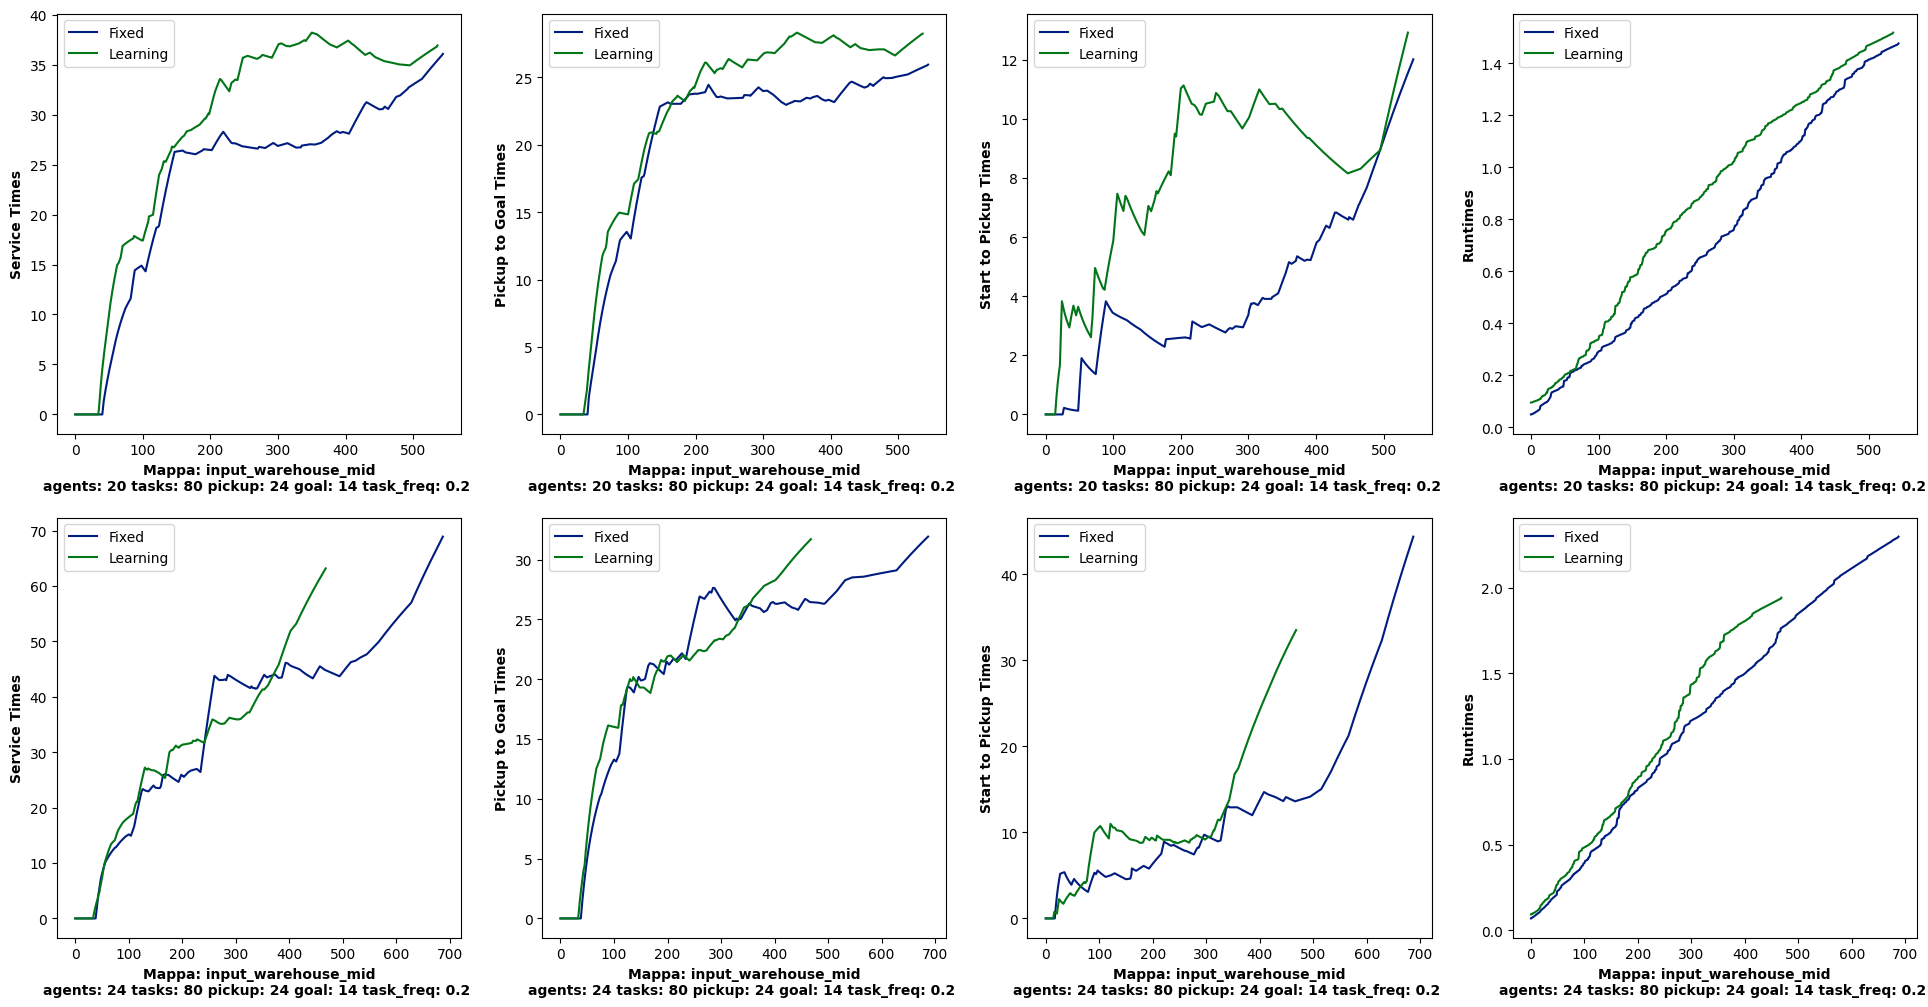

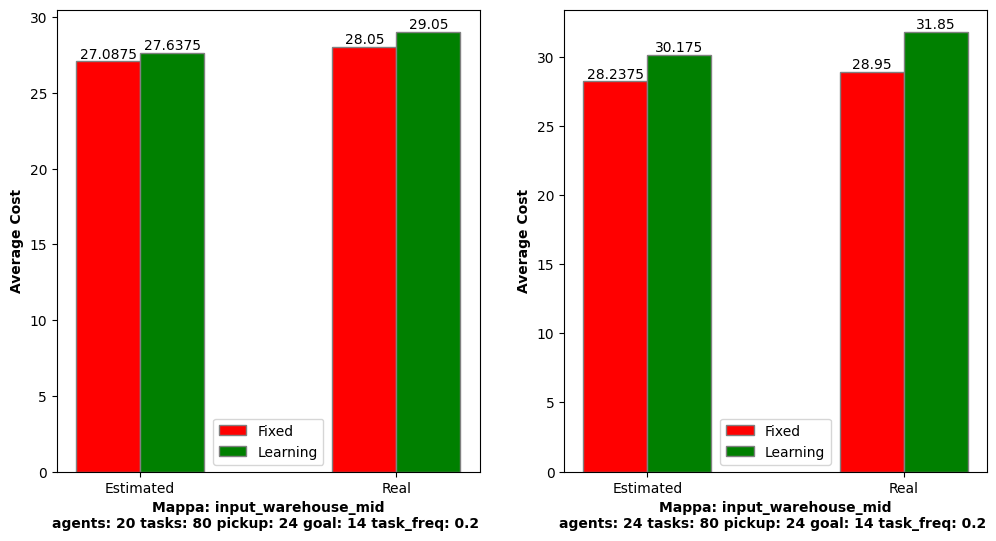

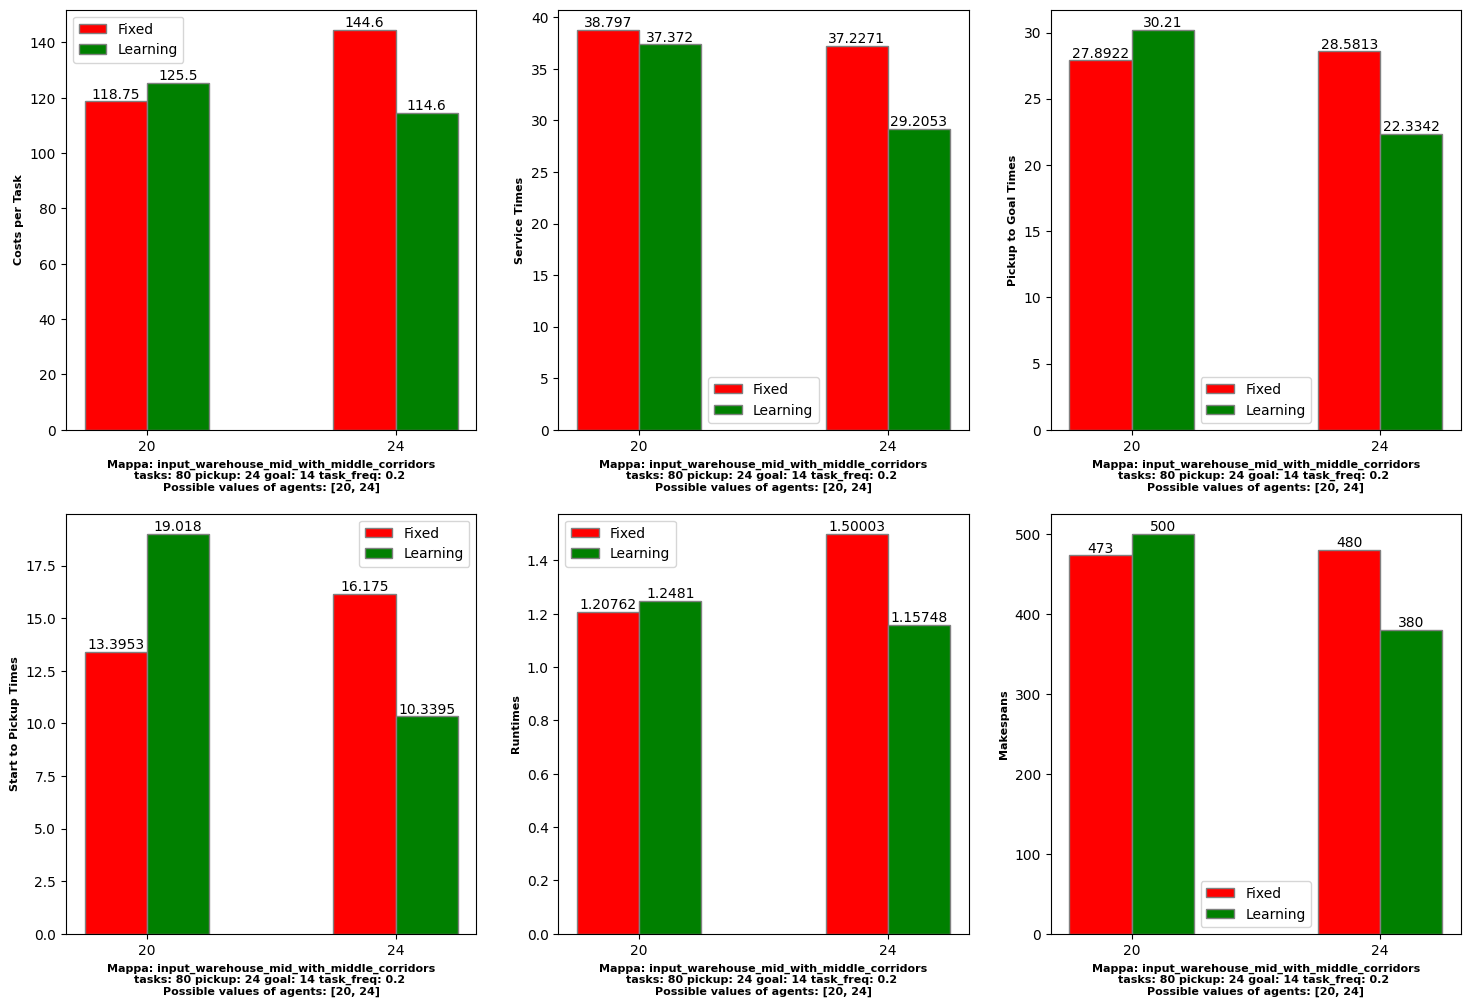

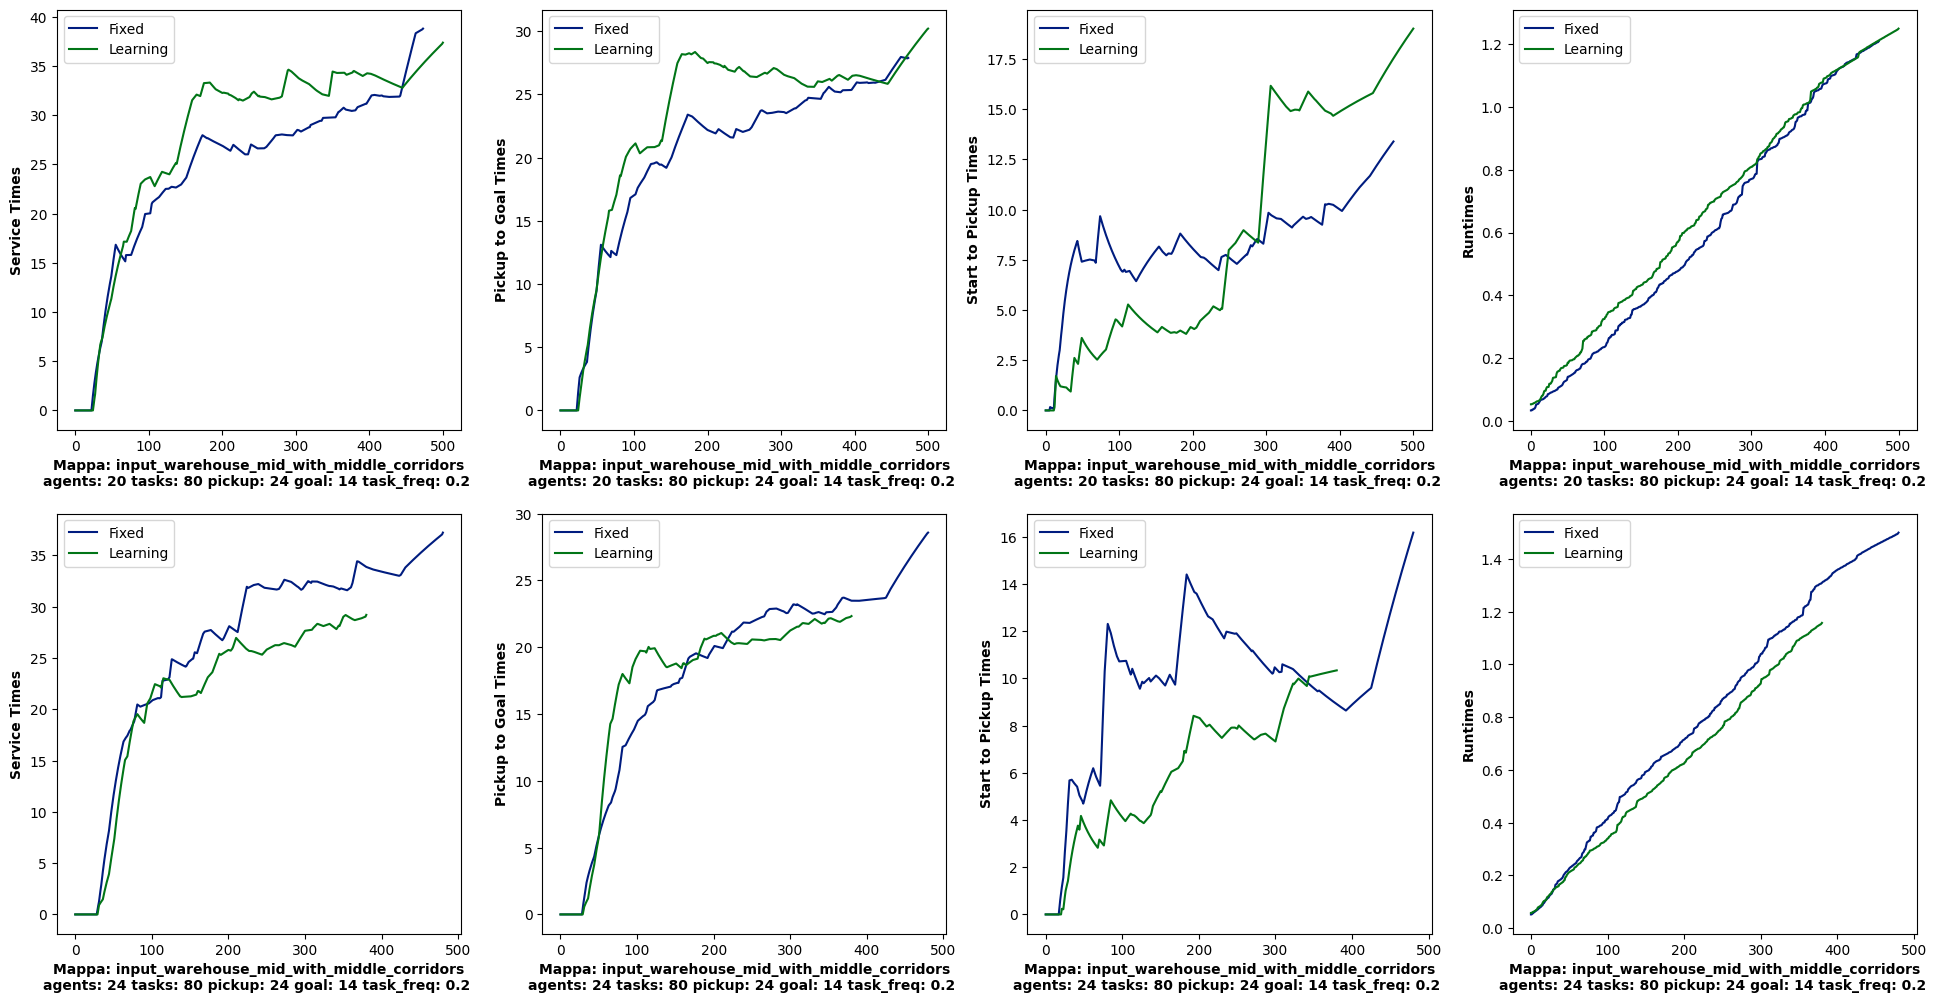

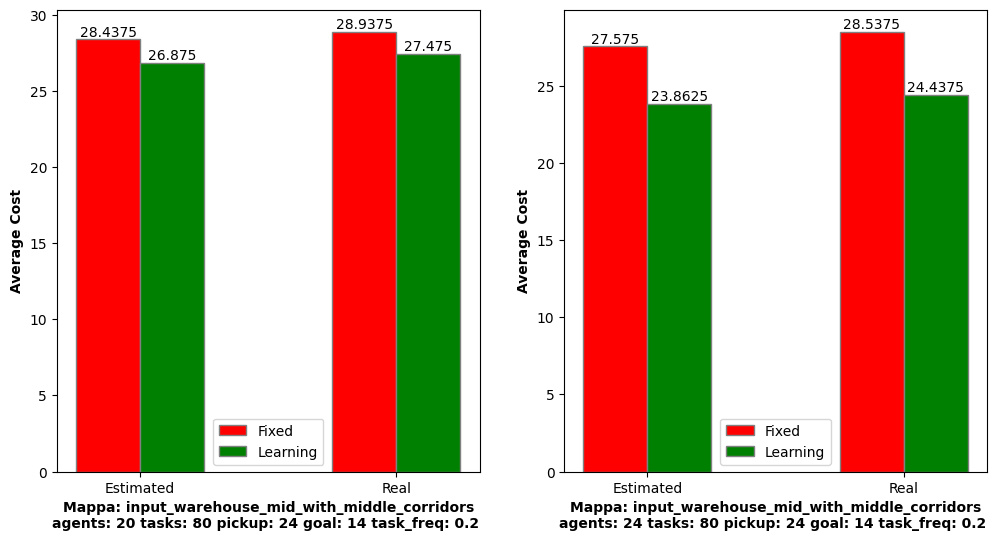

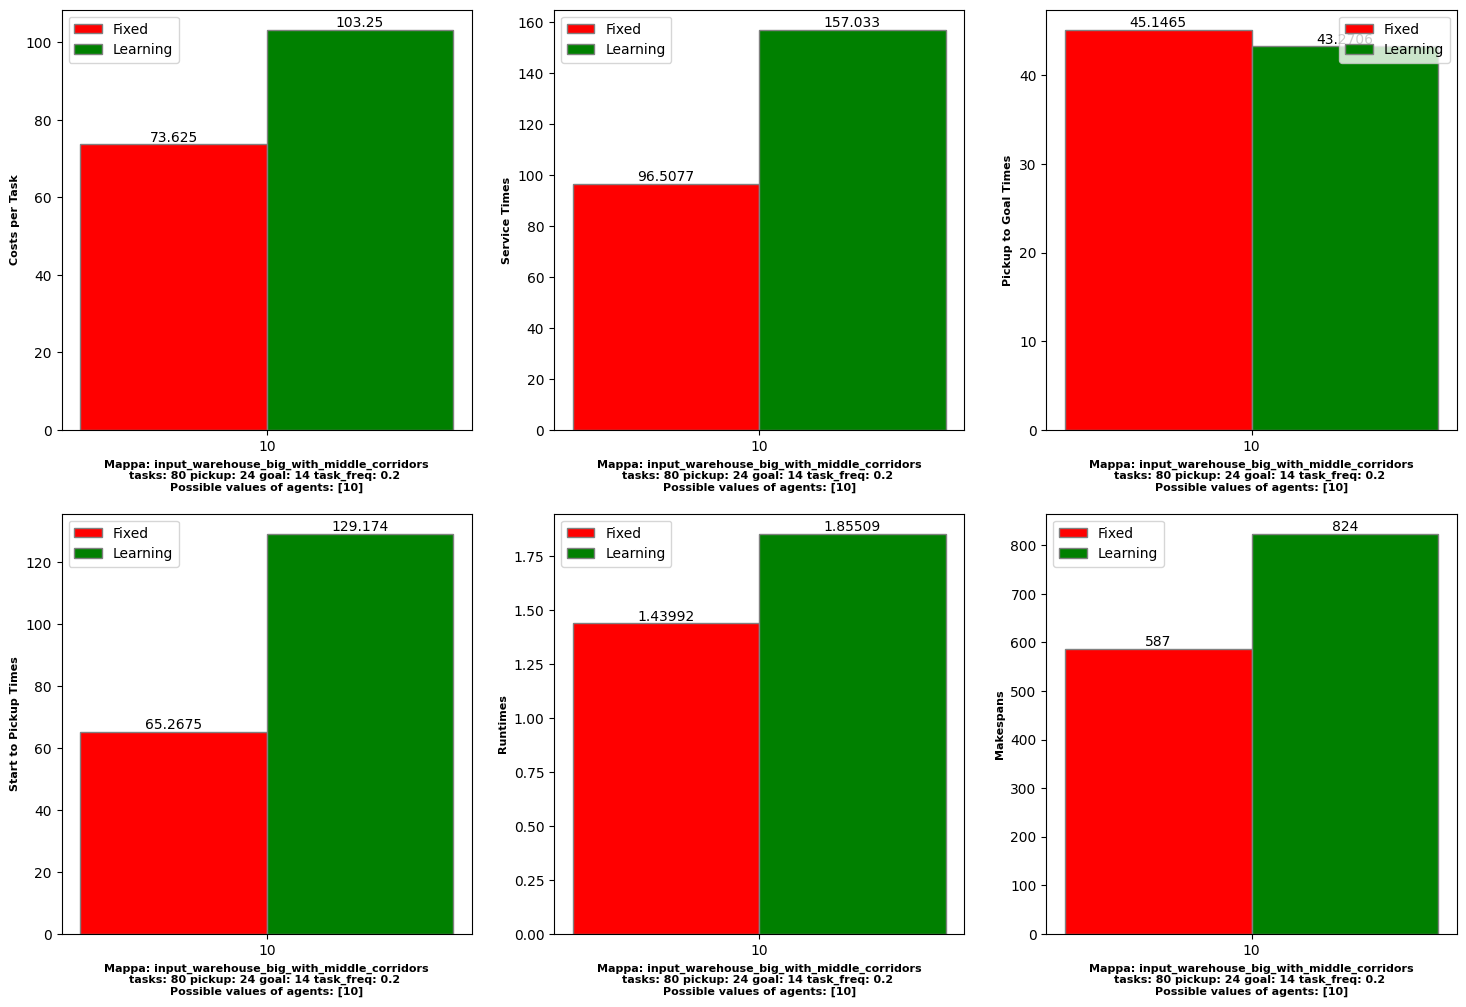

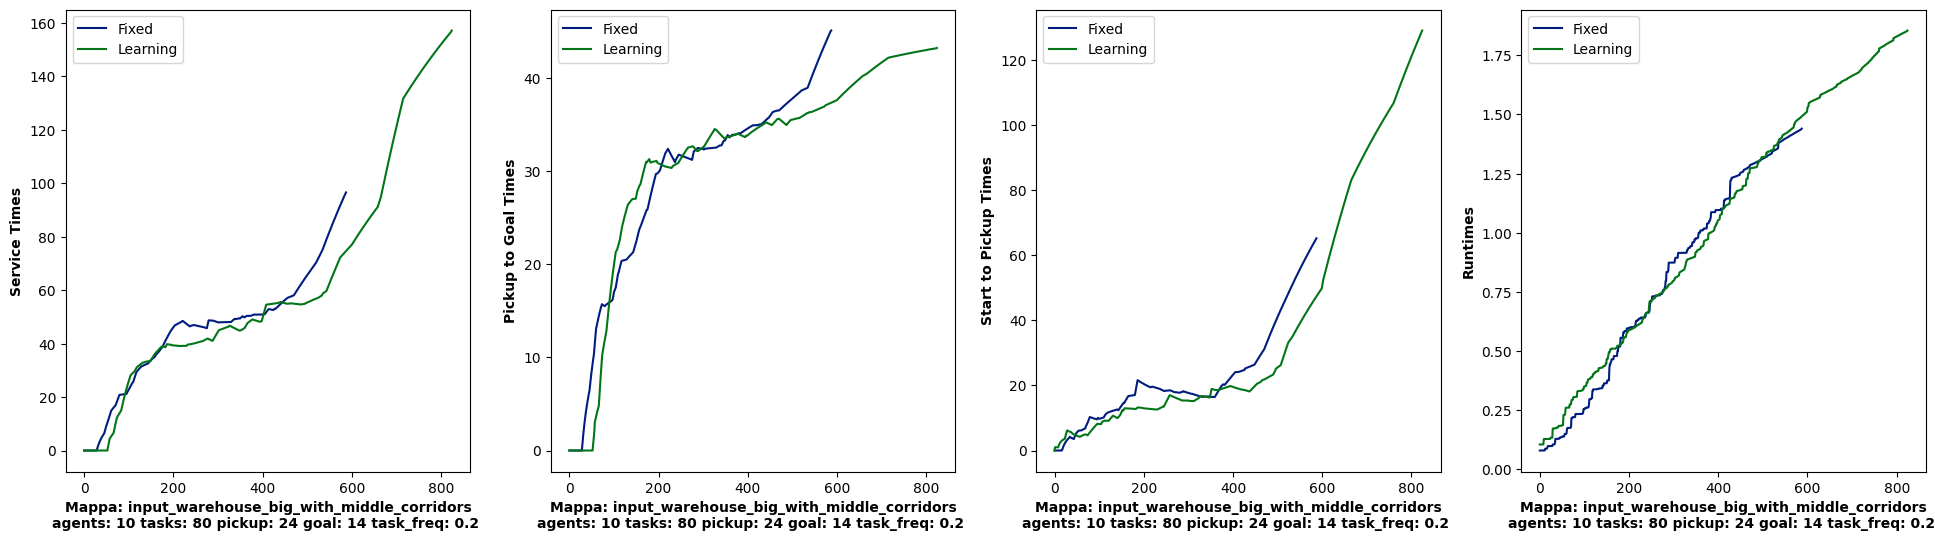

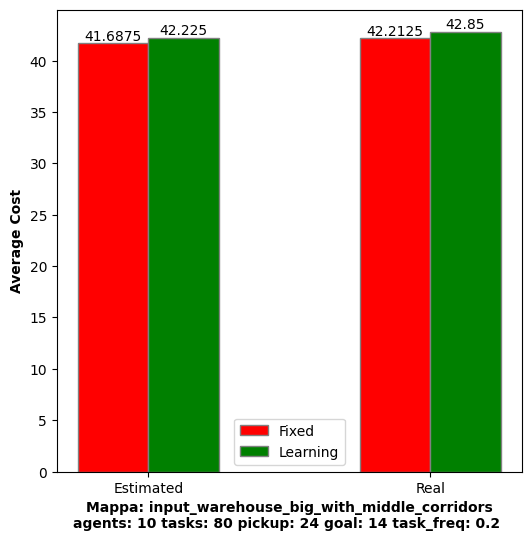

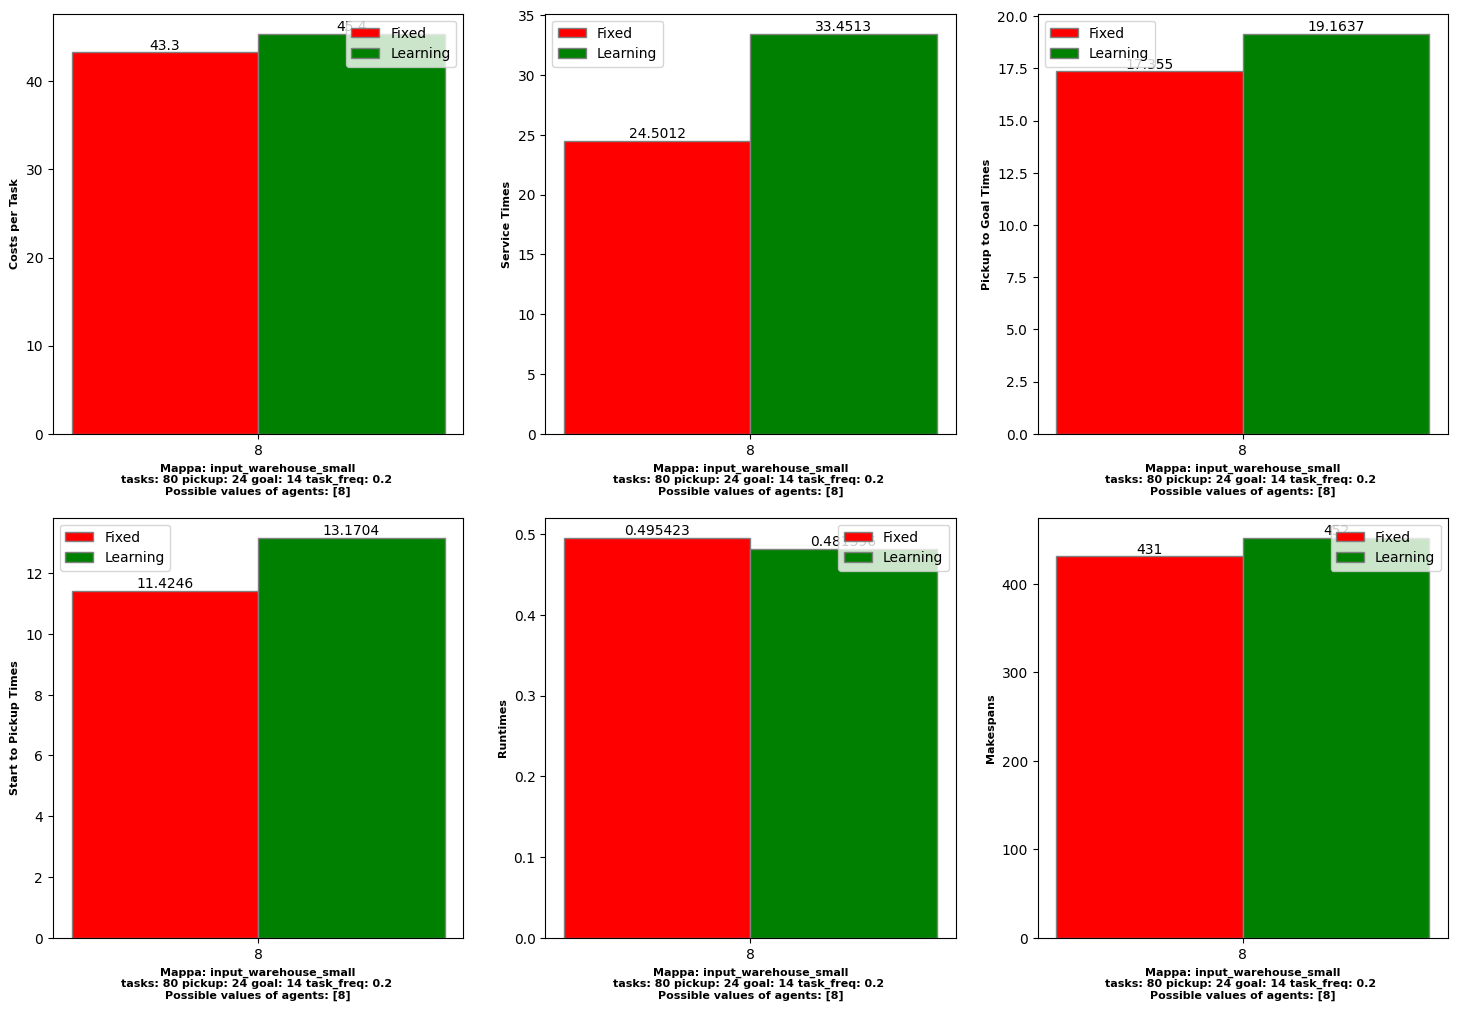

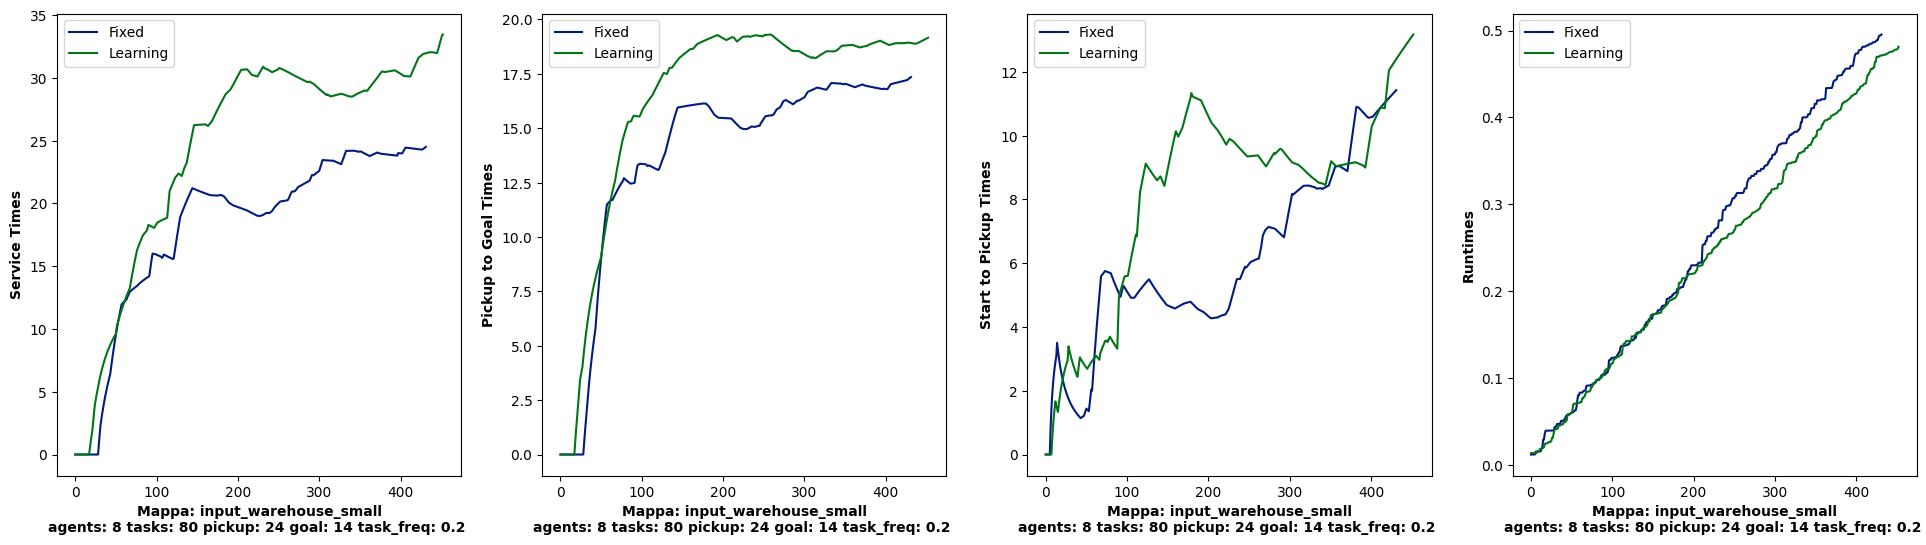

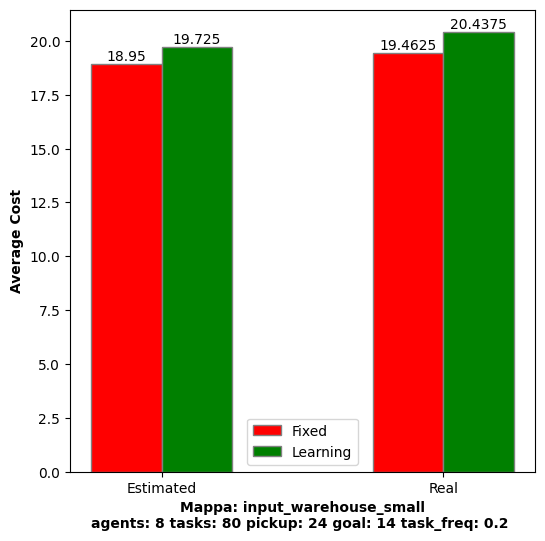

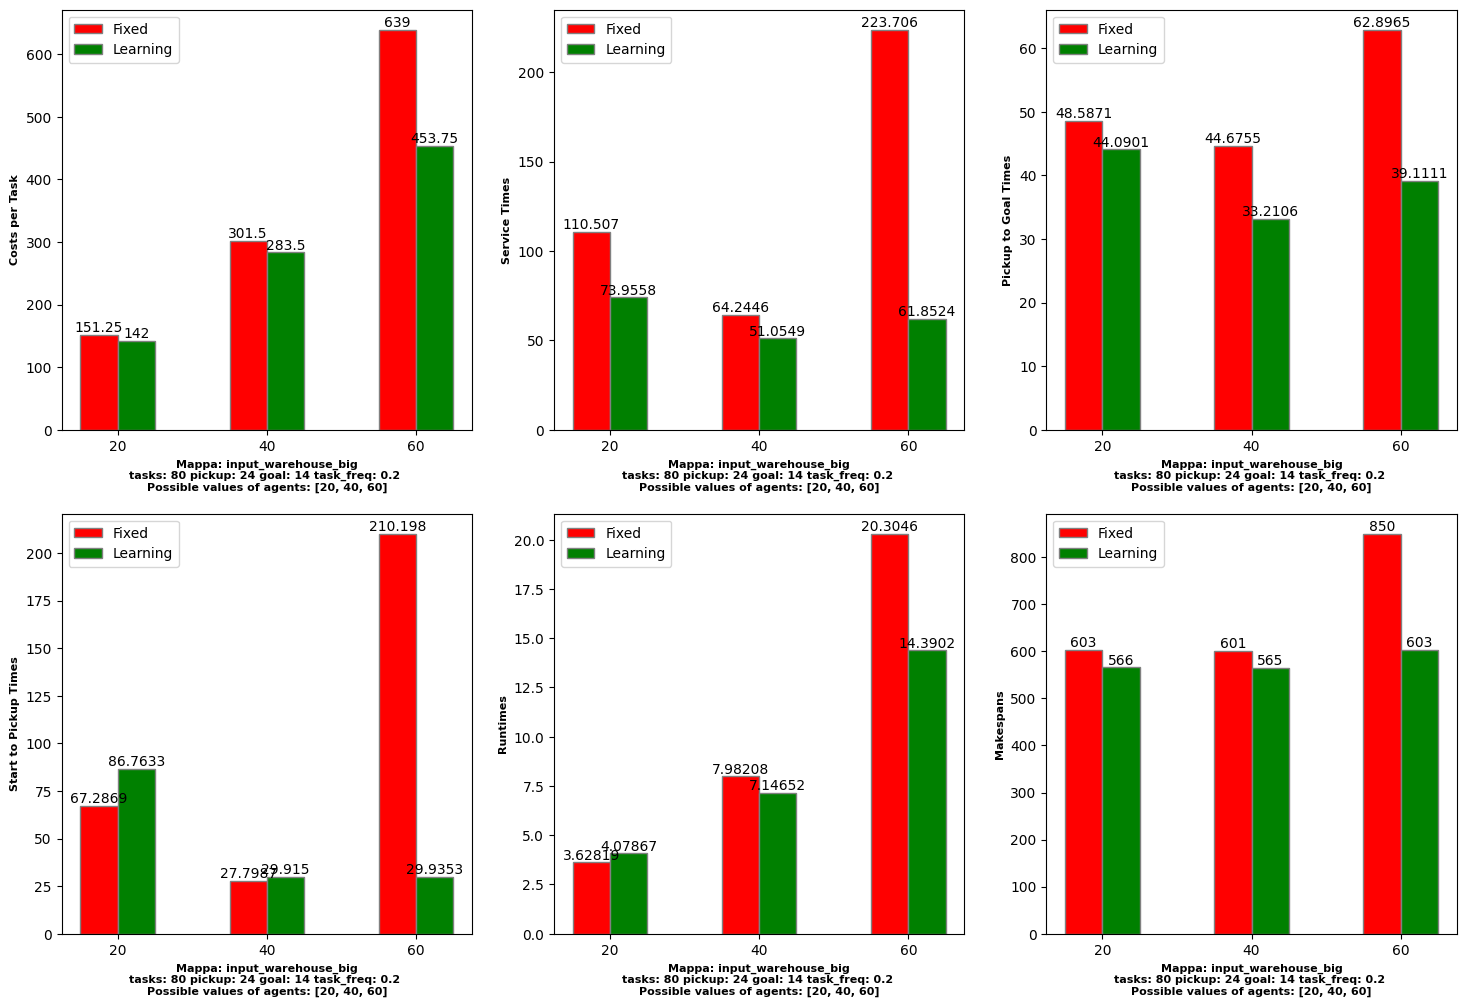

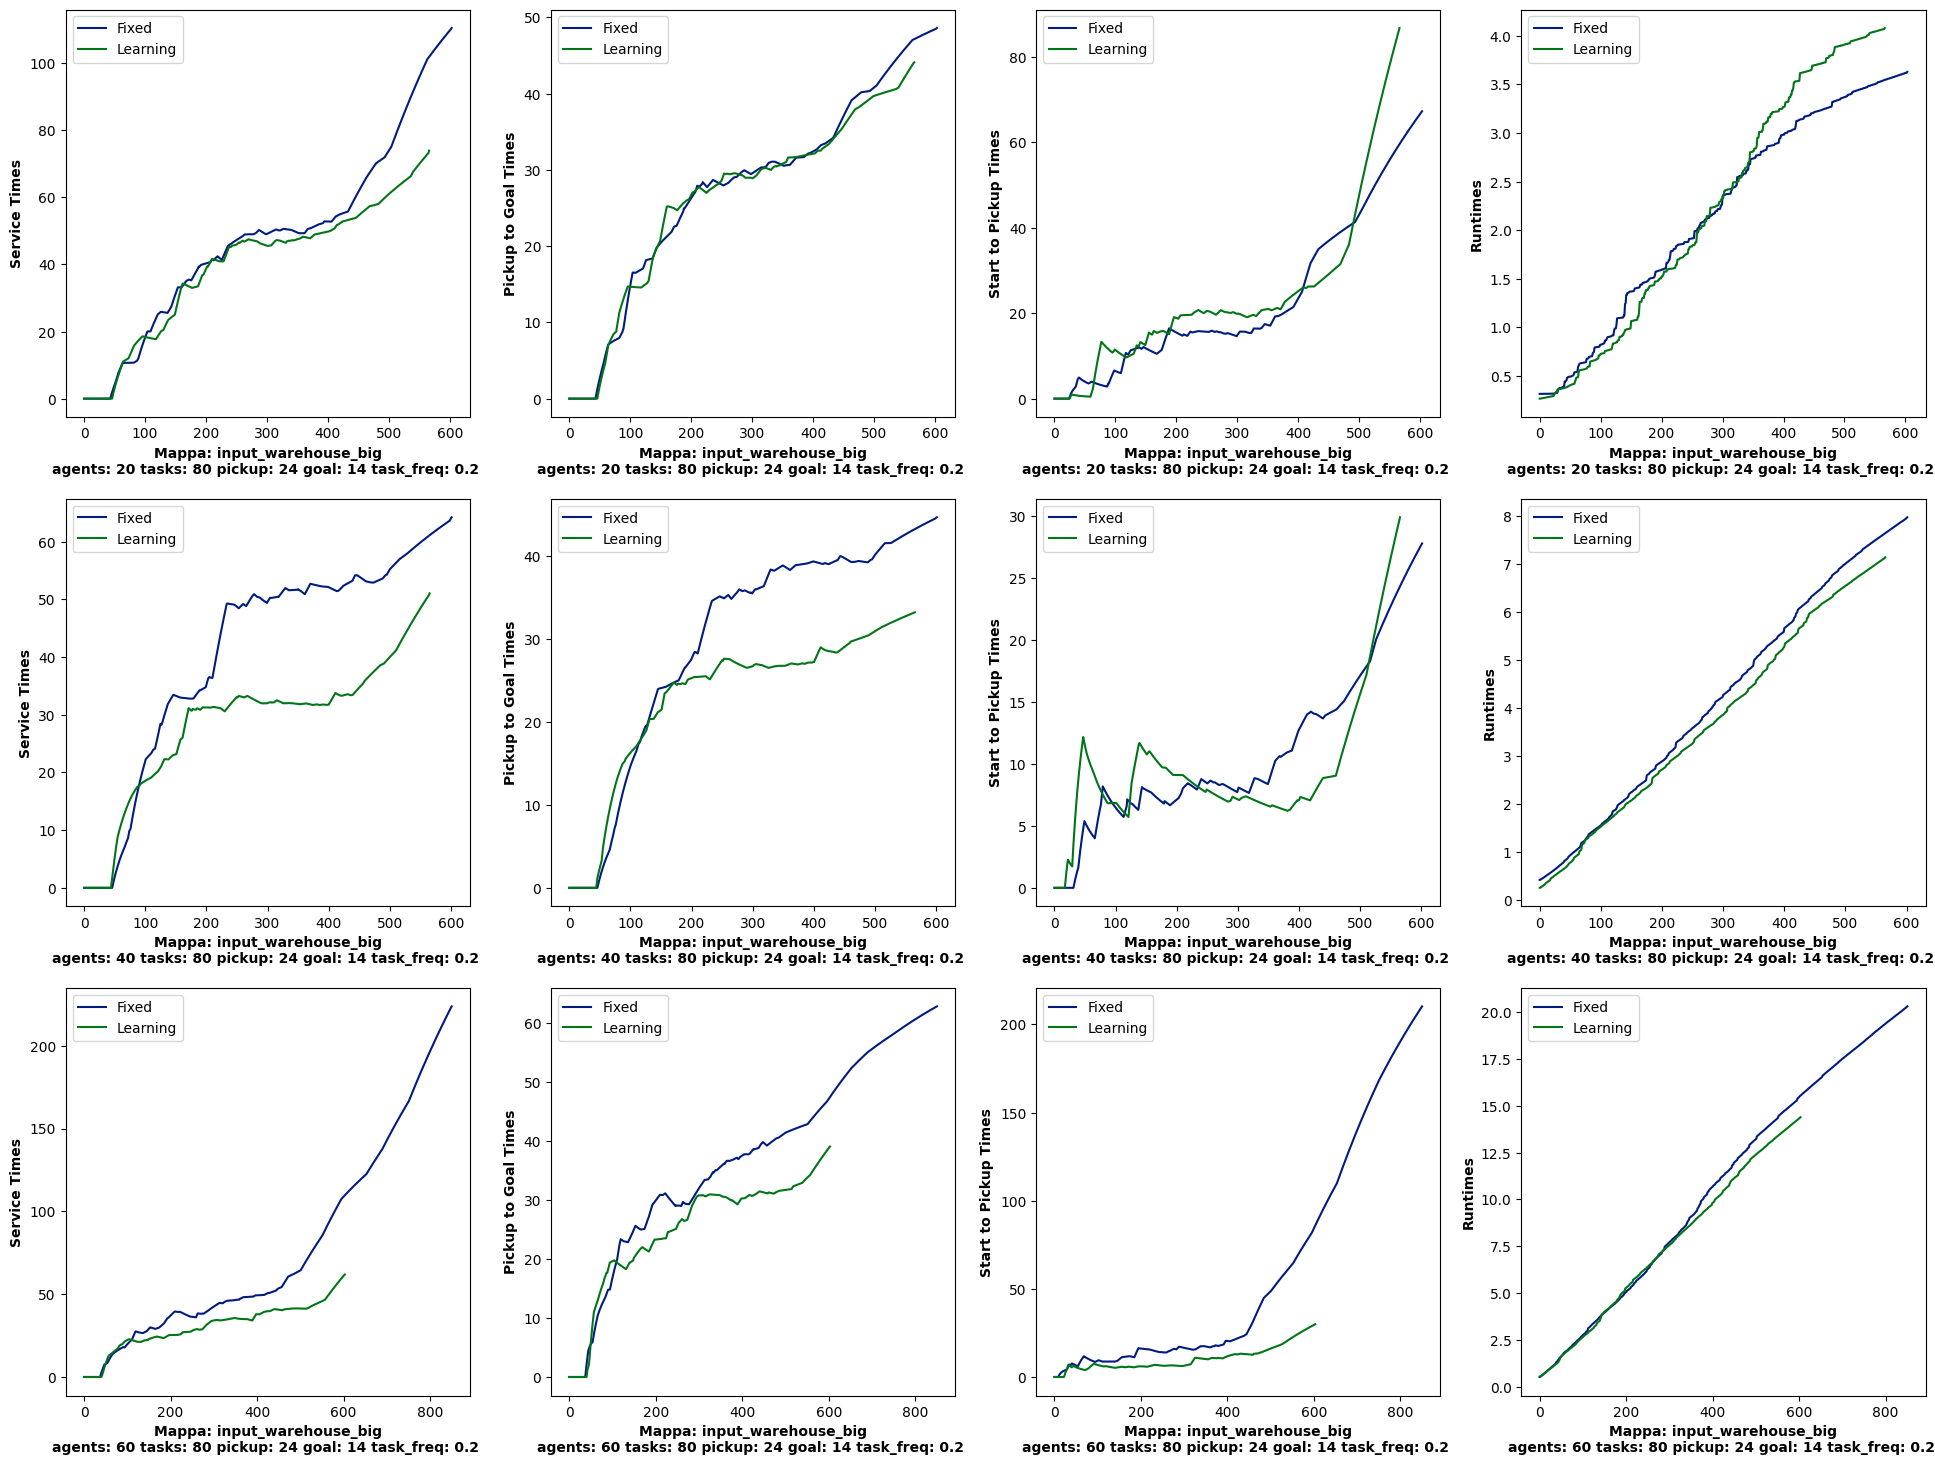

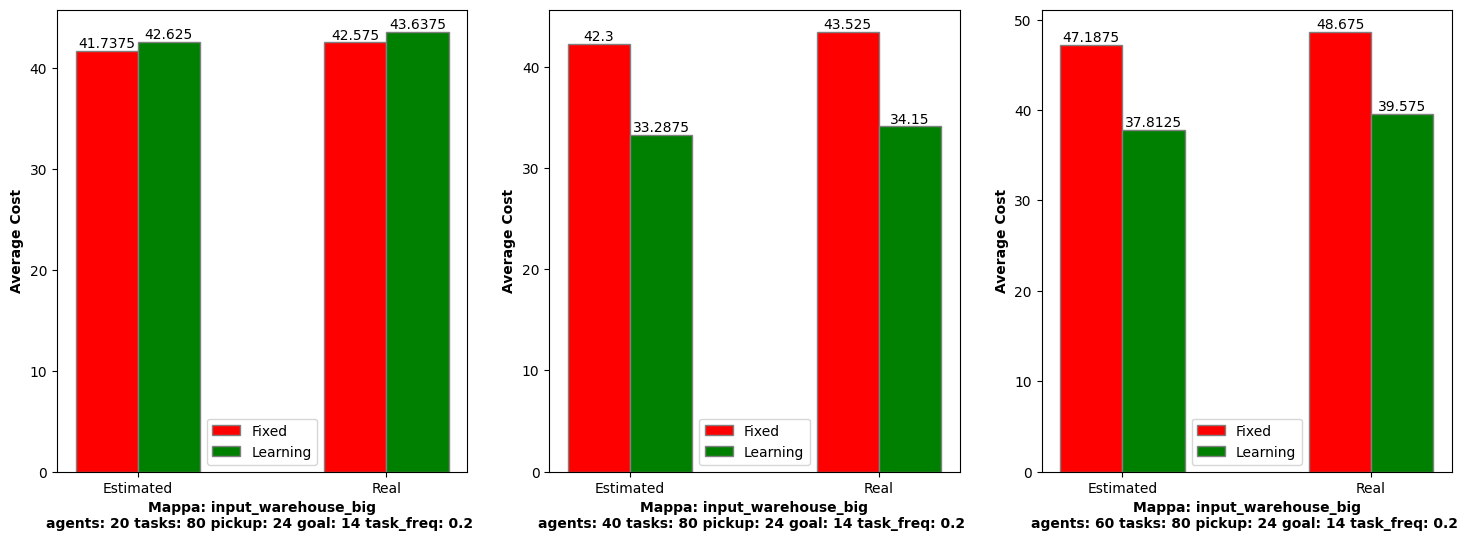

In [2]:
from stats_visualizer import StatsVisualizer

stats_visualizer = StatsVisualizer(maps, possible_number_of_agents, possible_number_of_tasks, possible_number_of_task_freq, possible_number_of_starts, possible_number_of_goals)

for my_map in stats_visualizer.get_map_names():
    stats_visualizer.show_all_metrics(my_map)